### Tasca M7 T01

Exercicis d'algoritmes de Classificació.

##### Primers passos: carregar la base de dades i els moduls adients

In [1]:
# Carreguem pandas, numpy i la base de dades

import pandas as pd
import numpy as np
vins = pd.read_csv('wineData.txt', 
        names =('Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline' ))
vins.head(2)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [2]:
vins.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [3]:
# veiem el tipus de valors
vins.dtypes

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [4]:
# comproben si hi ha valors nuls
vins.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

##### Fem el split
Primer definim X i y, despres fem el split 70-30

In [5]:
from sklearn.model_selection import train_test_split

X = vins[['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']]
y = vins['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 13), (54, 13), (124,), (54,))

In [7]:
X_train.sample(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.0,1035
54,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.2,1060


In [8]:
y_train.head(2)

138    3
104    2
Name: Class, dtype: int64

#### Descripció gráfica de les dades

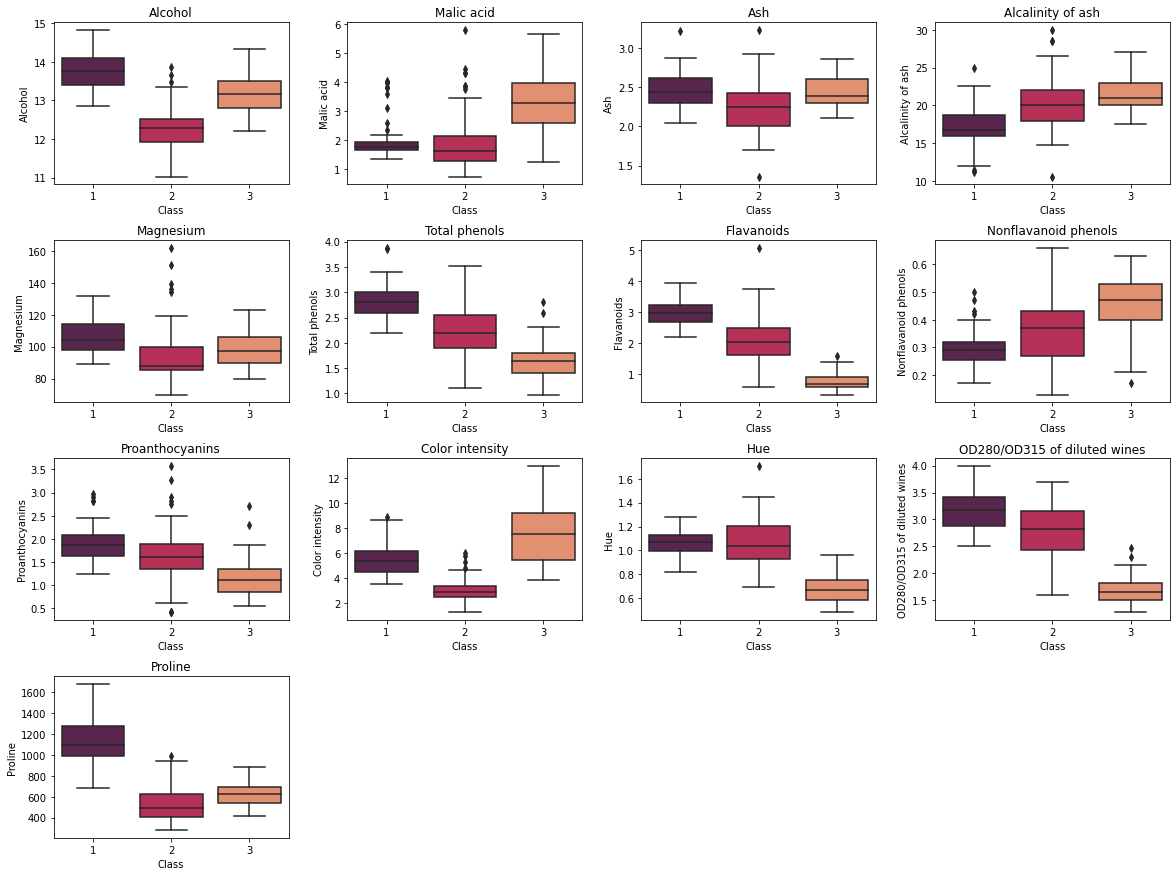

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=.35)

plt.subplot(4,4,1)
sns.boxplot(x = 'Class', y = 'Alcohol', data = vins, palette = 'rocket')
plt.title('Alcohol')

plt.subplot(4,4,2)
sns.boxplot(x = 'Class', y = 'Malic acid', data = vins, palette = 'rocket')
plt.title('Malic acid')

plt.subplot(4,4,3)
sns.boxplot(x = 'Class', y = 'Ash', data = vins, palette = 'rocket')
plt.title('Ash')

plt.subplot(4,4,4)
sns.boxplot(x = 'Class', y = 'Alcalinity of ash', data = vins, palette = 'rocket')
plt.title('Alcalinity of ash')

plt.subplot(4,4,5)
sns.boxplot(x = 'Class', y = 'Magnesium', data = vins, palette = 'rocket')
plt.title('Magnesium')

plt.subplot(4,4,6)
sns.boxplot(x = 'Class', y = 'Total phenols', data = vins, palette = 'rocket')
plt.title('Total phenols')

plt.subplot(4,4,7)
sns.boxplot(x = 'Class', y = 'Flavanoids', data = vins, palette = 'rocket')
plt.title('Flavanoids')

plt.subplot(4,4,8)
sns.boxplot(x = 'Class', y = 'Nonflavanoid phenols', data = vins, palette = 'rocket')
plt.title('Nonflavanoid phenols')

plt.subplot(4,4,9)
sns.boxplot(x = 'Class', y = 'Proanthocyanins', data = vins, palette = 'rocket')
plt.title('Proanthocyanins')

plt.subplot(4,4,10)
sns.boxplot(x = 'Class', y = 'Color intensity', data = vins, palette = 'rocket')
plt.title('Color intensity')

plt.subplot(4,4,11)
sns.boxplot(x = 'Class', y = 'Hue', data = vins, palette = 'rocket')
plt.title('Hue')

plt.subplot(4,4,12)
sns.boxplot(x = 'Class', y = 'OD280/OD315 of diluted wines', data = vins, palette = 'rocket')
plt.title('OD280/OD315 of diluted wines')

plt.subplot(4,4,13)
sns.boxplot(x = 'Class', y = 'Proline', data = vins, palette = 'rocket')
plt.title('Proline');

##### Comentari sobre les gràfiques:
Això ha sortit més interessant del que em pensava. Alguns atributs semblen molt bons per classificar alguna classe. Per exemple OD280/Od315 separa be la classe 3. Altres no semblen distigir entre cap de las classe, com per exemple l' Ash

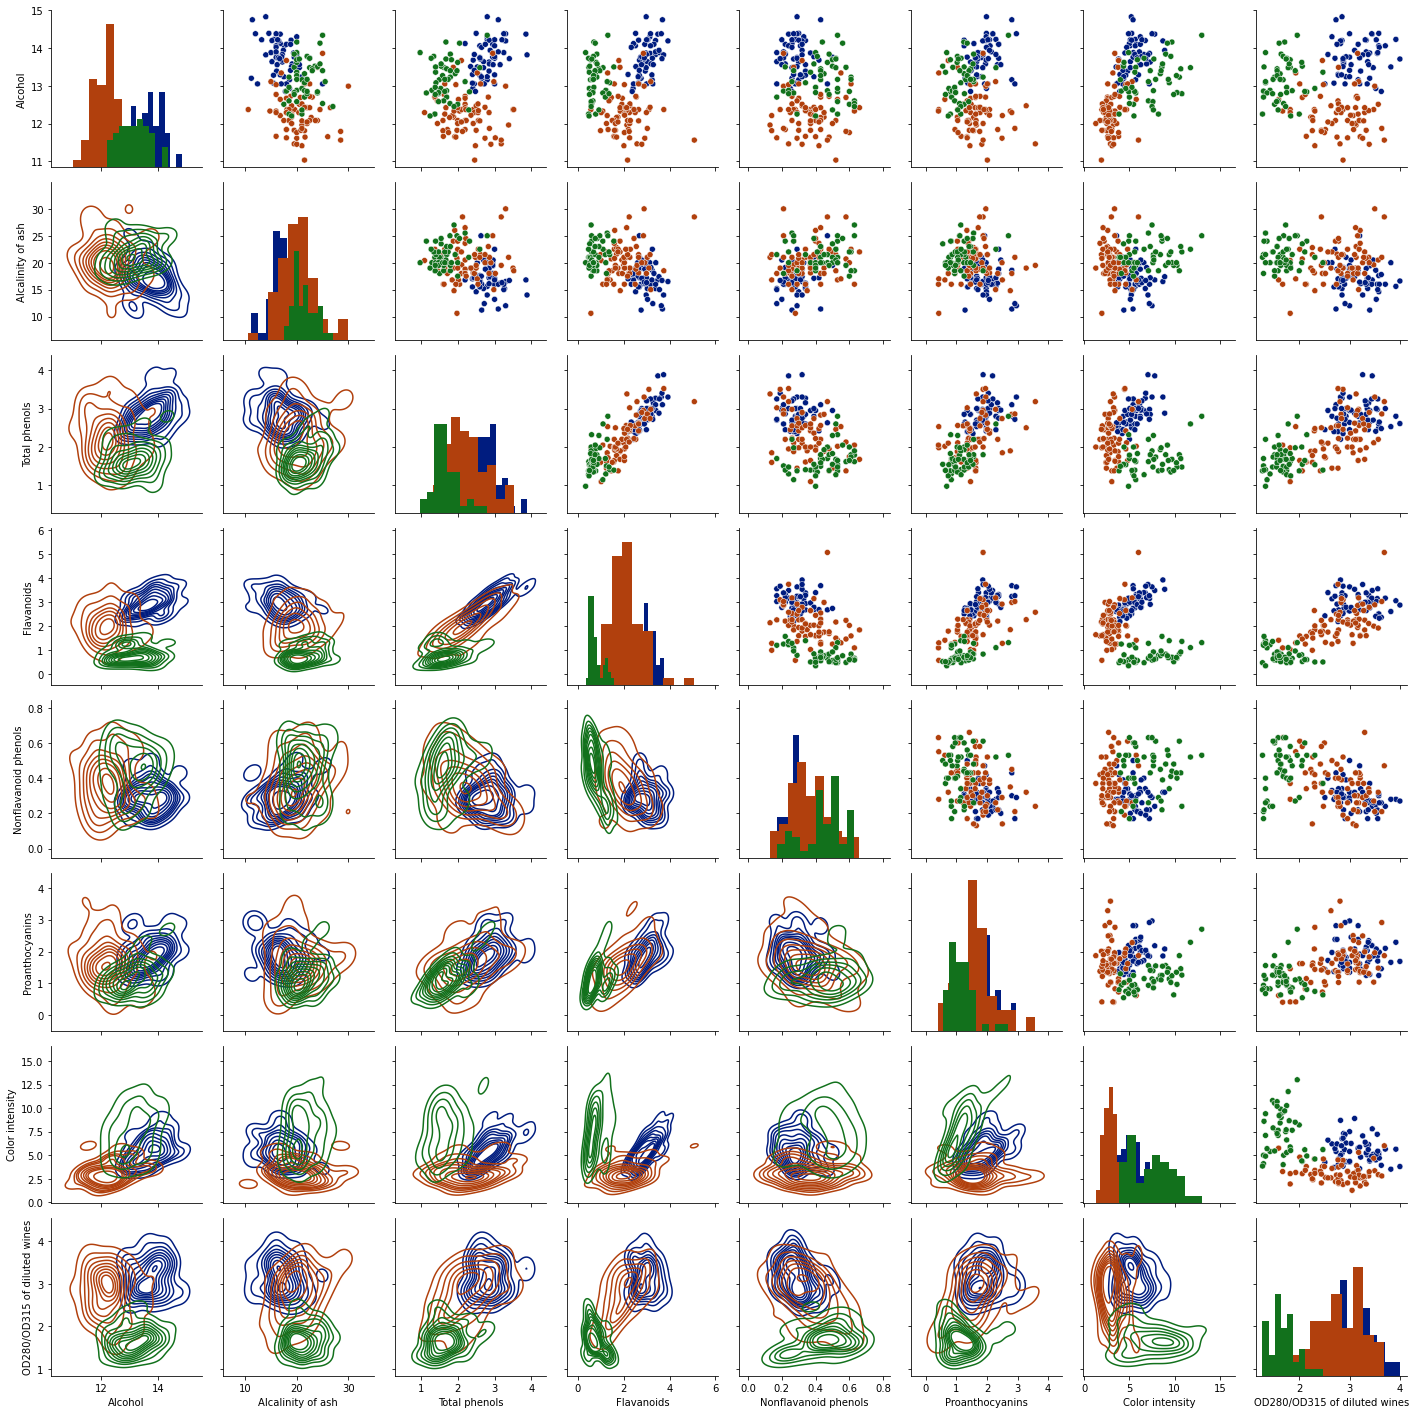

In [10]:
# veiem com es comporten les diferentes parelles en funció de la clase

import seaborn as sns

# Fem un DataFrame reduit amb les variables que separen millor les classes. 
# Fer-ho amb totes les variables dona uns grafic massa petits e incomprensibles
vins_reduit = vins[['Alcohol','Alcalinity of ash','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','OD280/OD315 of diluted wines','Class']].copy()

graph = sns.PairGrid(vins_reduit, hue= 'Class',palette='dark')
graph = graph.map_diag(plt.hist)
graph = graph.map_upper(sns.scatterplot)
graph = graph.map_lower(sns.kdeplot)
plt.show()

##### Comentari sobre les gràfiques.
Cap sorpresa aquí, no era esperable que només una parella de atributs fos prou bona per distinguir entre les differents classes, encara que es mostren agrupacons froça compactes en alguns casos

#### - Exercici 1

Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

#### Decision Tree Classifier
model1

In [11]:
# carreguem les llibreries
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #Per les metriques (accuracy)

#### Model 1: Decison Tree Classifier

In [12]:
# Creem el Decision Tree Classifer
model1 = DecisionTreeClassifier(random_state=42) # S'acostuma a fer servir clf, però farem servir model1 per consistencia
model1 = model1.fit(X_train,y_train)

#Fem la predicció pel dataset test
y_pred1 = model1.predict(X_test)

print(f"Accuracy (model1): {metrics.accuracy_score(y_test, y_pred1):.3f}")

Accuracy (model1): 0.963


##### Veiem l'arbre de decisió produit

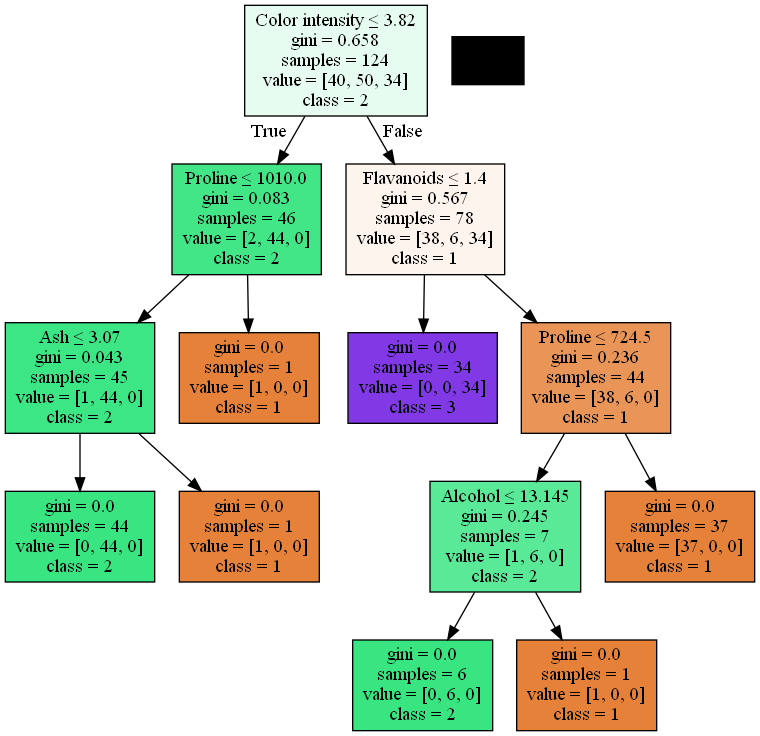

In [13]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import graphviz

dot_data = StringIO()
nom_columnes = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
export_graphviz(model1, out_file=dot_data,  
                filled=True, rounded=False,
                special_characters=True,feature_names = nom_columnes, 
                class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('vins.png')
Image(graph.create_png())

#### Classificacio amb KNN
model2

#### Model 2: KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() # s'acostuma a fer servir el nom classifier
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

print(f"Accuracy (model2): {metrics.accuracy_score(y_test, y_pred2):.3f}")





Accuracy (model2): 0.741


#### Model 3: svm

In [15]:
#Importem el model svm
from sklearn import svm

#Creem un model svm
model3 = svm.SVC(kernel='linear')
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)

print(f"Accuracy (model3): {metrics.accuracy_score(y_test, y_pred3):.3f}")

Accuracy (model3): 0.981


#### Model 4: XGBClassifier

In [16]:
# per fer aquest model necessitem que les classes siguin 0,1,2. Per això les recodifiquem
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)


In [17]:
import xgboost as xgb
from xgboost import XGBClassifier

model4 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model4.fit(X_train, y_train_le)

y_pred4 = model4.predict(X_test)
y_pred4_le = le.fit_transform(y_pred4) # i recodifiquem les prediccions per poder calcular la precissió

print(f"Accuracy (model4): {metrics.accuracy_score(y_test_le, y_pred4_le):.3f}")

Accuracy (model4): 0.944


####  - Exercici 2

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

In [18]:
print(f"Accuracy (model1: Decison Tree Classifier): {metrics.accuracy_score(y_test, y_pred1):.3f}")
print(f"Accuracy (model2: KNN)....................: {metrics.accuracy_score(y_test, y_pred2):.3f}")
print(f"Accuracy (model3: svm)....................: {metrics.accuracy_score(y_test, y_pred3):.3f}")
print(f"Accuracy (model4: XGBClassifier)..........: {metrics.accuracy_score(y_test_le, y_pred4_le):.3f}")

Accuracy (model1: Decison Tree Classifier): 0.963
Accuracy (model2: KNN)....................: 0.741
Accuracy (model3: svm)....................: 0.981
Accuracy (model4: XGBClassifier)..........: 0.944


In [19]:
#importing Seaborn's to use the heatmap 
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
# Posem el nom de les classes
nom_classes = ['1','2','3']

In [22]:
matriu_confussio1 = pd.DataFrame(confusion_matrix(y_test, y_pred1), 
                  columns=nom_classes, index = nom_classes)

matriu_confussio2 = pd.DataFrame(confusion_matrix(y_test, y_pred2), 
                  columns=nom_classes, index = nom_classes)

matriu_confussio3 = pd.DataFrame(confusion_matrix(y_test, y_pred3), 
                  columns=nom_classes, index = nom_classes)

matriu_confussio4 = pd.DataFrame(confusion_matrix(y_test_le, y_pred4_le), 
                  columns=nom_classes, index = nom_classes)


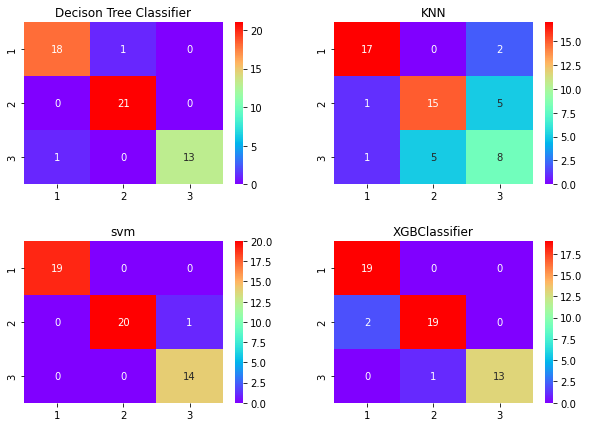

In [23]:
# Seaborn's heatmap to better visualize the confusion matrix
plt.figure(figsize=(10,7))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=.35)

plt.subplot(2,2,1)
sns.heatmap(matriu_confussio1, annot=True, fmt='d',cmap="rainbow")
plt.title('Decison Tree Classifier')

plt.subplot(2,2,2)
sns.heatmap(matriu_confussio2, annot=True, fmt='d',cmap="rainbow")
plt.title('KNN')

plt.subplot(2,2,3)
sns.heatmap(matriu_confussio3, annot=True, fmt='d',cmap="rainbow")
plt.title('svm')

plt.subplot(2,2,4)
sns.heatmap(matriu_confussio4, annot=True, fmt='d',cmap="rainbow")
plt.title('XGBClassifier');

In [24]:
print('model1: Decison Tree Classifier')
print(classification_report(y_test, y_pred1))

print('\nmodel2: KNN')
print(classification_report(y_test, y_pred2))

print('\nmodel3: svm')
print(classification_report(y_test, y_pred3))


print('\nmodel4: XGBClassifier')
print(classification_report(y_test_le, y_pred4_le))


model1: Decison Tree Classifier
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        19
           2       0.95      1.00      0.98        21
           3       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54


model2: KNN
              precision    recall  f1-score   support

           1       0.89      0.89      0.89        19
           2       0.75      0.71      0.73        21
           3       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54


model3: svm
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3     

#### - Exercici 3

Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

### Entrenem el model Decission Tree Classifier

#### Tots els posibles atributs pel Decission Tree Classifier, extret de l'ajuda del Jupyter Notebook
model1 = DecisionTreeClassifier()  
    x criterion='gini','entropy', 'log_loss'  
    x splitter='best','random'  
    x max_depth=(1,20)  
    x min_samples_split=2,  
    x min_samples_leaf=1,  
    min_weight_fraction_leaf=0.0,  
    max_features=None,  
    x random_state=None,  
    x max_leaf_nodes=None,  
    min_impurity_decrease=0.0,  
    min_impurity_split=None,  
    class_weight=None,  
    ccp_alpha=0.0,  

#### Anem a veure els differents atributs. volem determinar un rang on siguin millors

In [25]:
from sklearn.metrics import f1_score

In [26]:
# Max_depth

model1b_acc = []
model1b_f1 =[]
for max_d in range(1,10):
    model1b = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model1b.fit(X_train,y_train)
    y_pred1b = model1b.predict(X_test)
    score1b = metrics.accuracy_score(y_test, y_pred1b)
    score1c = f1_score(y_test, y_pred1b, average='weighted')
    model1b_acc.append(score1b)
    model1b_f1.append(score1c)

model1b_acc, model1b_f1

([0.6111111111111112,
  0.8703703703703703,
  0.9629629629629629,
  0.9629629629629629,
  0.9629629629629629,
  0.9629629629629629,
  0.9629629629629629,
  0.9629629629629629,
  0.9629629629629629],
 [0.5365967365967366,
  0.871716087999691,
  0.9632115280263428,
  0.9628353590455226,
  0.9628353590455226,
  0.9628353590455226,
  0.9628353590455226,
  0.9628353590455226,
  0.9628353590455226])

##### A partir de una max depth de 3, ni la accuracy ni la f1 score ja no milloren

In [27]:
# Maximum leaf nodes

model1b_acc = []
model1b_f1 =[]
for max_d in range(2,10):
    model1b = DecisionTreeClassifier(max_leaf_nodes=max_d, random_state=42)
    model1b.fit(X_train,y_train)
    y_pred1b = model1b.predict(X_test)
    score1b = metrics.accuracy_score(y_test, y_pred1b)
    score1c = f1_score(y_test, y_pred1b, average='weighted')
    model1b_acc.append(score1b)
    model1b_f1.append(score1c)

model1b_acc, model1b_f1

([0.6111111111111112,
  0.8518518518518519,
  0.9444444444444444,
  0.9629629629629629,
  0.9629629629629629,
  0.9629629629629629,
  0.9629629629629629,
  0.9629629629629629],
 [0.5365967365967366,
  0.8535778350593165,
  0.9449245541838134,
  0.9632115280263428,
  0.9632115280263428,
  0.9628353590455226,
  0.9628353590455226,
  0.9628353590455226])

##### Maximum leaf nodes: hi ha un máxim amb 5

In [28]:
# min_samples_split

model1b_acc = []
for max_d in range(2,10):
    model1b = DecisionTreeClassifier(min_samples_split=max_d, random_state=42)
    model1b.fit(X_train,y_train)
    y_pred1b = model1b.predict(X_test)
    score1b = metrics.accuracy_score(y_test, y_pred1b)
    model1b_acc.append(score1b)

model1b_acc

[0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629,
 0.9629629629629629]

##### min_samples_split la accuracy no varia

In [29]:
# min_weight_fraction_leaf

model1b_acc = []
rang = [0.0,0.1,0.2,0.3,0.4,0.5]
for max_d in rang:
    model1b = DecisionTreeClassifier(min_weight_fraction_leaf=max_d, random_state=42)
    model1b.fit(X_train,y_train)
    y_pred1b = model1b.predict(X_test)
    score1b = metrics.accuracy_score(y_test, y_pred1b)
    model1b_acc.append(score1b)

model1b_acc

[0.9629629629629629,
 0.8518518518518519,
 0.8518518518518519,
 0.8333333333333334,
 0.6111111111111112,
 0.5370370370370371]

##### Pel que fa a min_weight_fraction_leaf el valor 0 dona el millor resultat

In [30]:
# min_samples_leaf

model1b_acc = []
model1b_f1 = []
for max_d in range(1,10):
    model1b = DecisionTreeClassifier(min_samples_leaf=max_d, random_state=42)
    model1b.fit(X_train,y_train)
    y_pred1b = model1b.predict(X_test)
    score1b = metrics.accuracy_score(y_test, y_pred1b)
    score1c = f1_score(y_test, y_pred1b, average='weighted')
    model1b_acc.append(score1b)
    model1b_f1.append(score1c)

model1b_acc, model1b_f1

([0.9629629629629629,
  0.9814814814814815,
  0.9814814814814815,
  0.9444444444444444,
  0.9444444444444444,
  0.9444444444444444,
  0.9444444444444444,
  0.9444444444444444,
  0.9444444444444444],
 [0.9628353590455226,
  0.9813759628574443,
  0.9813538775640411,
  0.9449245541838134,
  0.9449245541838134,
  0.9449245541838134,
  0.9449245541838134,
  0.9449245541838134,
  0.9449245541838134])

##### Pel que fa a min_samples_leaf el valors 2 i 3 donen els millors resultats

In [31]:
# splitter

splitter=['best','random']

model1b_acc = []
for max_d in splitter:
    model1b = DecisionTreeClassifier(splitter = max_d, random_state=42)
    model1b.fit(X_train,y_train)
    y_pred1b = model1b.predict(X_test)
    score1b = metrics.accuracy_score(y_test, y_pred1b)
    model1b_acc.append(score1b)

model1b_acc

[0.9629629629629629, 0.8518518518518519]

##### Per splitter, l'opció de 'best' dona el millor resultat

In [32]:
# criterion

criterion=['gini','entropy']
model1b_acc = []
for max_d in criterion:
    model1b = DecisionTreeClassifier(criterion = max_d, random_state=42)
    model1b.fit(X_train,y_train)
    y_pred1b = model1b.predict(X_test)
    score1b = metrics.accuracy_score(y_test, y_pred1b)
    model1b_acc.append(score1b)

model1b_acc

[0.9629629629629629, 0.8518518518518519]

##### Per criterion, l'opció de 'gini' dona el millor resultat

### Entrenem el model DecissionTreeClassifier
#### Amb totes les dades obtingudes podem fer un GridSearch:

criterion, l'opció de 'gini'  
splitter, l'opció de 'best'  
Max_depth (1, 2, 3, 4, 5, 10)  
max_leaf_nodes=(3, 4, 5, 6, 7)  
min_samples_split = (2,3,4)  
min_weight_fraction_leaf = 0

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
parametres = {'max_depth': [1, 2, 3, 4, 5, 10],
    'max_leaf_nodes':[3, 4, 5, 6, 7],
    'min_samples_leaf': [5, 6, 7, 8],
    'min_samples_split': [2,3,4]}

model1b = DecisionTreeClassifier(random_state=42)

model1b_grid = GridSearchCV(estimator=model1b, param_grid=parametres, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
model1b_grid.fit(X_train, y_train)
model1b_grid.best_estimator_

Fitting 4 folds for each of 360 candidates, totalling 1440 fits


DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, min_samples_leaf=6,
                       random_state=42)

In [35]:
# Veiem les puntuacions dels 5 millors
score_model1b = pd.DataFrame(model1b_grid.cv_results_)
score_model1b[['param_max_depth','param_max_leaf_nodes','param_min_samples_leaf', 'mean_test_score']].nlargest(10,"mean_test_score")

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,mean_test_score
135,3,4,6,0.935484
136,3,4,6,0.935484
137,3,4,6,0.935484
147,3,5,6,0.935484
148,3,5,6,0.935484
149,3,5,6,0.935484
159,3,6,6,0.935484
160,3,6,6,0.935484
161,3,6,6,0.935484
171,3,7,6,0.935484


In [36]:
# Ara mostrem en nou arbre

# Aquest es el model amb el hiperparàmetres ajustats
model1_trained = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, min_samples_leaf=6,random_state=42)
model1_trained.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, min_samples_leaf=6,
                       random_state=42)

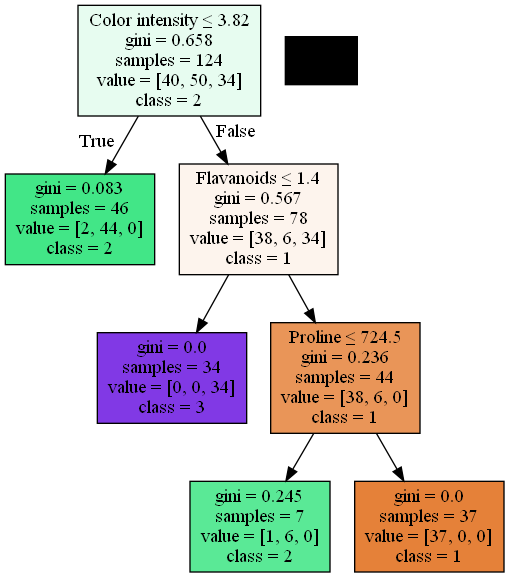

In [37]:
# Mostrem l'arbre

dot_data = StringIO()
nom_columnes = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
export_graphviz(model1_trained, out_file=dot_data,  
                filled=True, rounded=False,
                special_characters=True,feature_names = nom_columnes, 
                class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('vins.png')
Image(graph.create_png())

### Entrenem el model KNN


In [38]:
# Calculem el valor k optim

from sklearn.metrics import f1_score

model2_f1 = []
model2_acc = []
# Calculem el f1 score pel valors de k entre 1 i 40
for valor_k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=valor_k)
    knn.fit(X_train, y_train)
    y_pred2 = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    model2_f1.append(f1_score(y_test, y_pred2, average='weighted'))
    model2_acc.append(metrics.accuracy_score(y_test, y_pred2))

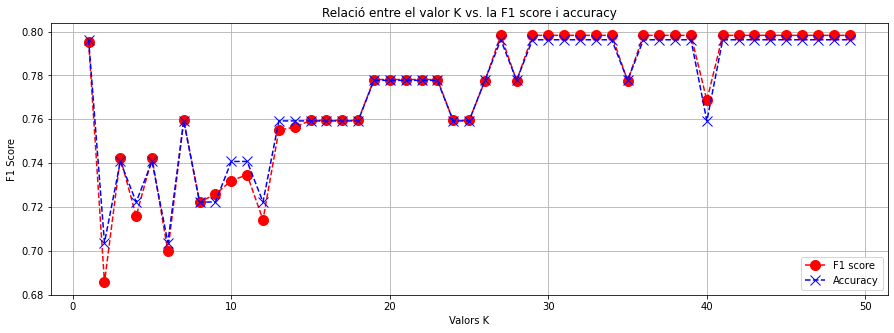

In [39]:
# Veiem els resultats gràficament

plt.figure(figsize=(15, 5))
plt.plot(range(1, 50), model2_f1, color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1, 50), model2_acc, color='blue', linestyle='dashed', marker='x',
         markerfacecolor='blue', markersize=10)
plt.title('Relació entre el valor K vs. la F1 score i accuracy')
plt.legend(['F1 score', 'Accuracy'])
plt.grid(which='major', axis='both')
plt.xlabel('Valors K')
plt.ylabel('F1 Score');

In [40]:
# Fent servir el valor k per defecte (5)
model2_class_5 = KNeighborsClassifier(n_neighbors=5)
model2_class_5.fit(X_train, y_train)
y_pred2c = model2_class_5.predict(X_test)

# fent servir el valor k òptim calculat 827)
model2_class = KNeighborsClassifier(n_neighbors=27)
model2_class.fit(X_train, y_train)
y_pred2b = model2_class.predict(X_test)

print('\nmodel2: KNN')
print('\namb el valor K per defecte')
print(classification_report(y_test, y_pred2c))
print('\ndesprès d\'ajustar el valor k')
print(classification_report(y_test, y_pred2b))




model2: KNN

amb el valor K per defecte
              precision    recall  f1-score   support

           1       0.89      0.89      0.89        19
           2       0.75      0.71      0.73        21
           3       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54


desprès d'ajustar el valor k
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.78      0.67      0.72        21
           3       0.59      0.71      0.65        14

    accuracy                           0.80        54
   macro avg       0.79      0.79      0.79        54
weighted avg       0.81      0.80      0.80        54



In [41]:
#Veiem-ho d'una altre manera, fent servir un GridSearch pel KNN

# Aquest son els paramentres que volem ajustar
leaf_size = list(range(1,10))
n_neighbors = list(range(20,30))
p=[1,2]

# Ho convertim a un diccionari
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Creem un nou KNN (2d)
model2d = KNeighborsClassifier()
#Fem el GridSearch
model2d_class = GridSearchCV(model2d, hyperparameters, cv=10)

#Fem el fit del model
millor_model2d = model2d_class.fit(X_train, y_train)

#Imprimim els millos hiperparametres
print('Best leaf_size:', millor_model2d.best_estimator_.get_params()['leaf_size'])
print('Best p:', millor_model2d.best_estimator_.get_params()['p'])
print('Best n_neighbors:', millor_model2d.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 24


### Entrenem el model svm

In [42]:
from sklearn import svm
#Generem un diccionari anomenat param_grid i posem alguns parametres pel kernel, C i gamma

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

#Generem un GridSearchCV

model3b = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
model3b.fit(X_train,y_train);



Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

In [43]:
# Mostrem el parametres òptims

print(model3b.best_estimator_)

SVC(C=0.1, gamma=1, kernel='poly')


#### - Exercici 4

Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

#### Fem la cross validation

In [44]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble


# Dividim les dades en 5 parts. 

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

contador = 1

for train_index, test_index in kf.split(X, y):
    print(f'Fold:{contador}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    contador+=1


Fold:1, Train set: 142, Test set:36
Fold:2, Train set: 142, Test set:36
Fold:3, Train set: 142, Test set:36
Fold:4, Train set: 143, Test set:35
Fold:5, Train set: 143, Test set:35


In [45]:
# Crossvalidation del DecissionTreeClassifier

score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')


Scores for each fold are: [0.92       0.92       1.         0.92       0.91666667]
Average score: 0.94


In [46]:
# Crossvalidation del KNN

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(leaf_size=1, n_neighbors=24, p=1)

score = cross_val_score(clf, X_train, y_train, cv=5)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.6        0.68       0.64       0.76       0.70833333]
Average score: 0.68


#### Un valor molt baix!

In [47]:
# Crossvalidation del svm

from sklearn.model_selection import cross_val_score
clf = svm.SVC(C=0.1, gamma=1, kernel='poly', random_state=42)


score = cross_val_score(clf, X_train, y_train, cv=5)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.68       0.96       0.88       0.96       0.95833333]
Average score: 0.89


In [48]:
model1_untrained = DecisionTreeClassifier(random_state=42)
model1_trained = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, min_samples_leaf=6,random_state=42)

model2_untrained = KNeighborsClassifier()
model2_trained = KNeighborsClassifier(leaf_size=1, n_neighbors=24, p=1)

model3_untrained = svm.SVC(kernel='linear')
model3_trained = svm.SVC(C=0.1, gamma=1, kernel='poly')

In [49]:
# Decision tree Classifier
model1_untrained_TrainSet = model1_untrained.fit(X_train,y_train)
y1_untrained_TrainSet = model1_untrained_TrainSet.predict(X_train)
matriu_confussio1_untrained_TrainSet = pd.DataFrame(confusion_matrix(y_train, y1_untrained_TrainSet), columns=nom_classes, index = nom_classes)

model1_untrained_TestSet = model1_untrained.fit(X_test,y_test)
y1_untrained_TestSet = model1_untrained_TestSet.predict(X_test)
matriu_confussio1_untrained_TestSet = pd.DataFrame(confusion_matrix(y_test, y1_untrained_TestSet), columns=nom_classes, index = nom_classes)

model1_trained_TrainSet = model1_trained.fit(X_train,y_train)
y1_trained_TrainSet = model1_trained_TrainSet.predict(X_train)
matriu_confussio1_trained_TrainSet = pd.DataFrame(confusion_matrix(y_train, y1_trained_TrainSet), columns=nom_classes, index = nom_classes)

model1_trained_TestSet = model1_trained.fit(X_test,y_test)
y1_trained_TestSet = model1_trained_TestSet.predict(X_test)
matriu_confussio1_trained_TestSet = pd.DataFrame(confusion_matrix(y_test, y1_trained_TestSet), columns=nom_classes, index = nom_classes)


model2_untrained_TrainSet = model1_untrained.fit(X_train,y_train)
y2_untrained_TrainSet = model2_untrained_TrainSet.predict(X_train)
matriu_confussio2_untrained_TrainSet = pd.DataFrame(confusion_matrix(y_train, y2_untrained_TrainSet), columns=nom_classes, index = nom_classes)

model2_untrained_TestSet = model1_untrained.fit(X_test,y_test)
y2_untrained_TestSet = model2_untrained_TestSet.predict(X_test)
matriu_confussio2_untrained_TestSet = pd.DataFrame(confusion_matrix(y_test, y2_untrained_TestSet), columns=nom_classes, index = nom_classes)

model2_trained_TrainSet = model2_trained.fit(X_train,y_train)
y2_trained_TrainSet = model2_trained_TrainSet.predict(X_train)
matriu_confussio2_trained_TrainSet = pd.DataFrame(confusion_matrix(y_train, y2_trained_TrainSet), columns=nom_classes, index = nom_classes)

model2_trained_TestSet = model2_trained.fit(X_test,y_test)
y2_trained_TestSet = model2_trained_TestSet.predict(X_test)
matriu_confussio2_trained_TestSet = pd.DataFrame(confusion_matrix(y_test, y2_trained_TestSet), columns=nom_classes, index = nom_classes)


model3_untrained_TrainSet = model3_untrained.fit(X_train,y_train)
y3_untrained_TrainSet = model3_untrained_TrainSet.predict(X_train)
matriu_confussio3_untrained_TrainSet = pd.DataFrame(confusion_matrix(y_train, y3_untrained_TrainSet), columns=nom_classes, index = nom_classes)

model3_untrained_TestSet = model3_untrained.fit(X_test,y_test)
y3_untrained_TestSet = model3_untrained_TestSet.predict(X_test)
matriu_confussio3_untrained_TestSet = pd.DataFrame(confusion_matrix(y_test, y3_untrained_TestSet), columns=nom_classes, index = nom_classes)

model3_trained_TrainSet = model3_trained.fit(X_train,y_train)
y3_trained_TrainSet = model3_trained_TrainSet.predict(X_train)
matriu_confussio3_trained_TrainSet = pd.DataFrame(confusion_matrix(y_train, y3_trained_TrainSet), columns=nom_classes, index = nom_classes)

model3_trained_TestSet = model3_trained.fit(X_test,y_test)
y3_trained_TestSet = model3_trained_TestSet.predict(X_test)
matriu_confussio3_trained_TestSet = pd.DataFrame(confusion_matrix(y_test, y3_trained_TestSet), columns=nom_classes, index = nom_classes)



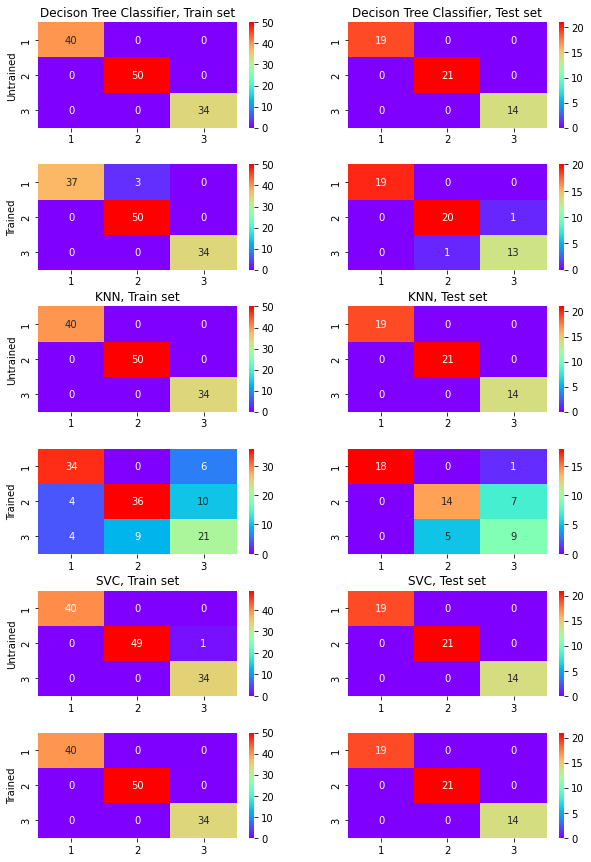

In [50]:
# Seaborn's heatmap to better visualize the confusion matrix
plt.figure(figsize=(10,15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=.35)

plt.subplot(6,2,1)
sns.heatmap(matriu_confussio1_untrained_TrainSet, annot=True, fmt='d',cmap="rainbow")
plt.title('Decison Tree Classifier, Train set')
plt.ylabel('Untrained')

plt.subplot(6,2,2)
sns.heatmap(matriu_confussio1_untrained_TestSet, annot=True, fmt='d',cmap="rainbow")
plt.title('Decison Tree Classifier, Test set')

plt.subplot(6,2,3)
sns.heatmap(matriu_confussio1_trained_TrainSet, annot=True, fmt='d',cmap="rainbow")
plt.title('')
plt.ylabel('Trained')

plt.subplot(6,2,4)
sns.heatmap(matriu_confussio1_trained_TestSet, annot=True, fmt='d',cmap="rainbow")
plt.title('')



plt.subplot(6,2,5)
sns.heatmap(matriu_confussio2_untrained_TrainSet, annot=True, fmt='d',cmap="rainbow")
plt.title('KNN, Train set')
plt.ylabel('Untrained')

plt.subplot(6,2,6)
sns.heatmap(matriu_confussio2_untrained_TestSet, annot=True, fmt='d',cmap="rainbow")
plt.title('KNN, Test set')

plt.subplot(6,2,7)
sns.heatmap(matriu_confussio2_trained_TrainSet, annot=True, fmt='d',cmap="rainbow")
plt.title('')
plt.ylabel('Trained')

plt.subplot(6,2,8)
sns.heatmap(matriu_confussio2_trained_TestSet, annot=True, fmt='d',cmap="rainbow")
plt.title('')


plt.subplot(6,2,9)
sns.heatmap(matriu_confussio3_untrained_TrainSet, annot=True, fmt='d',cmap="rainbow")
plt.title('SVC, Train set')
plt.ylabel('Untrained')

plt.subplot(6,2,10)
sns.heatmap(matriu_confussio3_untrained_TestSet, annot=True, fmt='d',cmap="rainbow")
plt.title('SVC, Test set')

plt.subplot(6,2,11)
sns.heatmap(matriu_confussio3_trained_TrainSet, annot=True, fmt='d',cmap="rainbow")
plt.title('')
plt.ylabel('Trained')

plt.subplot(6,2,12)
sns.heatmap(matriu_confussio3_trained_TestSet, annot=True, fmt='d',cmap="rainbow")
plt.title('');

#### Comentari: 
Aquest resultats son concordants amb els obtinguts amb la crossvalidation. En aquell cas vam veure que el training funcionaba força be per el DecissionTreeClassifier y el SVC, però no pas pel KNN

In [51]:
print('Accuracy pel DecissionTreeClassifier')
print("Model sense entrenar: ", f"TrainSet: {metrics.accuracy_score(y_train, y1_untrained_TrainSet):.3f}", 
      "vs." ,f"TestSet{metrics.accuracy_score(y_test, y1_untrained_TestSet):.3f}")
print("Model entrenat: ",f"TrainSet: {metrics.accuracy_score(y_train, y1_trained_TrainSet):.3f}",
      "vs." ,f"TestSet{metrics.accuracy_score(y_test, y1_trained_TestSet):.3f}")

print('\nAccuracy pel KNN')
print("Model sense entrenar: ", f"TrainSet: {metrics.accuracy_score(y_train, y2_untrained_TrainSet):.3f}", 
      "vs." ,f"TestSet{metrics.accuracy_score(y_test, y2_untrained_TestSet):.3f}")
print("Model entrenat: ",f"TrainSet: {metrics.accuracy_score(y_train, y2_trained_TrainSet):.3f}",
      "vs." ,f"TestSet{metrics.accuracy_score(y_test, y2_trained_TestSet):.3f}")

print('\nAccuracy pel SVM')
print("Model sense entrenar: ", f"TrainSet: {metrics.accuracy_score(y_train, y3_untrained_TrainSet):.3f}", 
      "vs." ,f"TestSet{metrics.accuracy_score(y_test, y3_untrained_TestSet):.3f}")
print("Model entrenat: ",f"TrainSet: {metrics.accuracy_score(y_train, y3_trained_TrainSet):.3f}",
      "vs." ,f"TestSet{metrics.accuracy_score(y_test, y3_trained_TestSet):.3f}")


print('\nF1 Score pel DecissionTreeClassifier')
print("Model sense entrenar: ", f"TrainSet: {f1_score(y_train, y1_untrained_TrainSet, average='weighted'):.3f}", 
      "vs." ,f"TestSet{f1_score(y_test, y1_untrained_TestSet, average='weighted'):.3f}")
print("Model entrenat: ", f"TrainSet: {f1_score(y_train, y1_trained_TrainSet, average='weighted'):.3f}", 
      "vs." ,f"TestSet{f1_score(y_test, y1_trained_TestSet, average='weighted'):.3f}")

print('\nF1 Score pel KNN')
print("Model sense entrenar: ", f"TrainSet: {f1_score(y_train, y2_untrained_TrainSet, average='weighted'):.3f}", 
      "vs." ,f"TestSet{f1_score(y_test, y1_trained_TestSet, average='weighted'):.3f}")
print("Model entrenat: ", f"TrainSet: {f1_score(y_train, y2_trained_TrainSet, average='weighted'):.3f}", 
      "vs." ,f"TestSet{f1_score(y_test, y1_trained_TestSet, average='weighted'):.3f}")

print('\nF1 Score pel SVM')
print("Model sense entrenar: ", f"TrainSet: {f1_score(y_train, y3_untrained_TrainSet, average='weighted'):.3f}", 
      "vs." ,f"TestSet{f1_score(y_test, y3_trained_TestSet, average='weighted'):.3f}")
print("Model entrenat: ", f"TrainSet: {f1_score(y_train, y3_trained_TrainSet, average='weighted'):.3f}", 
      "vs." ,f"TestSet{f1_score(y_test, y3_trained_TestSet, average='weighted'):.3f}")


Accuracy pel DecissionTreeClassifier
Model sense entrenar:  TrainSet: 1.000 vs. TestSet1.000
Model entrenat:  TrainSet: 0.976 vs. TestSet0.963

Accuracy pel KNN
Model sense entrenar:  TrainSet: 1.000 vs. TestSet1.000
Model entrenat:  TrainSet: 0.734 vs. TestSet0.759

Accuracy pel SVM
Model sense entrenar:  TrainSet: 0.992 vs. TestSet1.000
Model entrenat:  TrainSet: 1.000 vs. TestSet1.000

F1 Score pel DecissionTreeClassifier
Model sense entrenar:  TrainSet: 1.000 vs. TestSet1.000
Model entrenat:  TrainSet: 0.976 vs. TestSet0.963

F1 Score pel KNN
Model sense entrenar:  TrainSet: 1.000 vs. TestSet0.963
Model entrenat:  TrainSet: 0.735 vs. TestSet0.963

F1 Score pel SVM
Model sense entrenar:  TrainSet: 0.992 vs. TestSet1.000
Model entrenat:  TrainSet: 1.000 vs. TestSet1.000


#### Comentari sobre aquest resultat:
Podria ser raonable que els valors fent servir el set Train siguin molt alts, ja que son les dades que s'han fet servir per generar el models de classificació.
Ara, al mirar el set de dades Test, es veu molta diferencia segons com ho mesurem. El KNN dona un valor relativament baix d'accuracy, però molt alt si mirem el F1 score. 

#### - Exercici 5

Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

##### Aqui fem una estandarització de les dades

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[ 0.62844732,  1.08120605, -0.65212742, ..., -0.64137827,
        -1.07090115, -0.51821917],
       [-0.54088231, -0.61299439, -1.42753372, ...,  0.34652993,
         1.33076844, -0.21506322],
       [-0.75565714, -1.28703113, -1.53830605, ...,  0.43243499,
        -0.39843366,  0.04196031],
       ...,
       [ 1.69038953, -0.48547393,  0.04943066, ...,  1.03377042,
         0.54851034,  2.66821356],
       [-0.32610748, -0.79516648, -0.39365865, ...,  0.00290969,
        -0.74152932, -0.79830892],
       [-0.74372521,  0.04282513,  0.34482354, ..., -0.6843308 ,
         1.07001574, -0.98613381]])

In [53]:
# Creem el Decision Tree Classifer
scaled_model1 = DecisionTreeClassifier(random_state=42)

#Fem la predicció pel dataset train
y_pred_train_scaled = model1.predict(X_train_scaled)

#Fem la predicció pel dataset test
y_pred_test_scaled = model1.predict(X_test_scaled)

print(f"Accuracy (scaled_model_train): {metrics.accuracy_score(y_train, y_pred_train_scaled):.3f}")
print(f"Accuracy (scaled_model_test): {metrics.accuracy_score(y_test, y_pred_test_scaled):.3f}")

Accuracy (scaled_model_train): 0.403
Accuracy (scaled_model_test): 0.389


#### Un valor tremendament baix comparat amb els valors que estavem obtenint sense estadarització!  
En els calculs anteriors sortia un valor de l'accuracy de 1.0 aproximadament, sense massa variació  

#### Fem el entrenament, de totes maneres, a veure que surt

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
parametres = {'max_depth': [1, 2, 3, 4, 5, 10],
    'max_leaf_nodes':[3, 4, 5, 6, 7],
    'min_samples_leaf': [5, 6, 7, 8],
    'min_samples_split': [2,3,4]}

model1b_scaled = DecisionTreeClassifier(random_state=42)

model1b_scaled_grid = GridSearchCV(estimator=model1b_scaled, param_grid=parametres, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
model1b_scaled_grid.fit(X_train_scaled, y_train)
model1b_scaled_grid.best_estimator_

Fitting 4 folds for each of 360 candidates, totalling 1440 fits


DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, min_samples_leaf=6,
                       random_state=42)

In [56]:
model1c_trained_scaled = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, min_samples_leaf=6,random_state=42)

model1c_scaled = model1c_trained_scaled.fit(X_train_scaled,y_train)

#Fem la predicció pel dataset train
y_pred_train_scaled = model1c_scaled.predict(X_train_scaled)

#Fem la predicció pel dataset test
y_pred_test_scaled = model1c_scaled.predict(X_test_scaled)

print(f"Accuracy (scaled_model_train): {metrics.accuracy_score(y_train, y_pred_train_scaled):.3f}")
print(f"Accuracy (scaled_model_test): {metrics.accuracy_score(y_test, y_pred_test_scaled):.3f}")

Accuracy (scaled_model_train): 0.976
Accuracy (scaled_model_test): 0.944


#### I ara si que ha sortit molt millor que sense entrenar!